<!-- dom:TITLE: Diagramme de rayonnement -->
# Diagramme de rayonnement
<!-- dom:AUTHOR: Ahmed Ammar Email:ahmed.ammar@fst.utm.tn at Institut Préparatoire aux Études Scientifiques et Techniques, Université de Carthage. -->
<!-- Author: -->  
**Ahmed Ammar** (email: `ahmed.ammar@fst.utm.tn`), Institut Préparatoire aux Études Scientifiques et Techniques, Université de Carthage.

Date: **16 décembre 2020**

Copyright 2020, Ahmed Ammar. Released under CC Attribution 4.0 license

In [1]:
%config InlineBackend.figure_format = 'svg'

<!-- TOC: on -->
# Diagramme de rayonnement
La puissance surfacique rayonnée dépend localement de l'angle $\theta$. Elle est maximale dans le plan équatorial et s'annule dans l'axe du dipôle. Pour représenter graphiquement cette dépendance angulaire, on trace la courbe suivante en coordonnées polaires [[perez1997electromagnetisme]](#perez1997electromagnetisme):

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\rho (\theta)=sin^2 \theta
\label{_auto1} \tag{1}
\end{equation}
$$

## Simulation Python

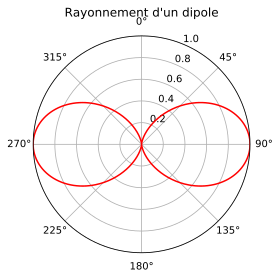

In [3]:
## NOM DU PROGRAMME: DipRadiation.py
#% IMPORTATION
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0,2*np.pi,500)
rho = np.sin(theta)**2
plt.figure()
ax = plt.subplot(111, polar=True)
ax.plot(theta, rho,color='r')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rmax(1.0)
ax.set_title("Rayonnement d'un dipole", va='bottom')
theta = np.linspace(0.01,2*np.pi,500)
plt.tight_layout()
plt.show()

Ce tracé est un diagramme de rayonnement (ou indicatrice de rayonnement). Il permet de voir comment évolue la puissance avec l'angle. On voit par exemple que la puissance est égale à la moitié de sa valeur maximale pour un angle de 45 degrés.

Pour tracer le diagramme de rayonnement sur un graphe 3D, nous devons passer par une fonction de conversion de coordonnées sphériques/cartésiennes; `sph2cart(azimuth,elevation,r)`:

In [7]:
## NOM DU PROGRAMME: DipRadiation3D.py
#% IMPORTATION
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
import matplotlib.colors as mcolors

def sph2cart(azimuth,elevation,r):
    """
    Convertisseur de Coordonnée Sphérique/Cartésienne
    """
    x = r * np.sin(elevation) * np.cos(azimuth)
    y = r * np.sin(elevation) * np.sin(azimuth)
    z = r * np.cos(elevation)
    return x, y, z
theta = np.linspace(0.001,np.pi,400)
phi = np.linspace(0.001,2*np.pi,400)
THETA, PHI = np.meshgrid(theta,phi)
RHO = np.sin(THETA)**2
X, Y, Z = sph2cart(PHI,THETA,RHO)
fig = plt.figure(figsize=(7,5))
cmap = plt.get_cmap('gnuplot')
ax2 = plt.subplot(111, projection='3d')
ax2._axis3don = False # hide x, y, z axis
norm = mcolors.Normalize(vmin=Z.min(), vmax=Z.max())
ax2.plot_surface(X, Y, Z, rstride=8, cstride=8,
                 facecolors=cmap(norm(Z)), antialiased=True, alpha=0.5)
fig.suptitle("Rayonnement d'un dipole (3D)")
plt.tight_layout()
plt.show()


## Antenne dipolaire

Pour une antenne dipolaire de longueur L, le calcul est très complexe car on ne connaît pas a priori l'expression de l'intensité I(z,t) du courant dans l'antenne. Les calculs conduisent à l'expression suivante :

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
I(z,t)=I_0 sin(\frac{L}{2}-z)e^{-i \omega t}
\label{_auto2} \tag{2}
\end{equation}
$$

On par ailleurs I(-z,t)=I(z,t). Le courant s'annule aux extrémités et varie sinusoïdalement avec une période $\lambda$. Connaissant le courant, on peut calculer le champ électromagnétique en sommant les contributions des segments élémentaires, qui sont des dipôles oscillants.

Pour une antenne de longueur petite devant la longueur d'onde, le courant décroît linéairement entre sa valeur $I_0$ au centre de l'antenne et une valeur nulle à l'extrémité. Dans ce cas, on peut utiliser les résultats du dipôle oscillant en remplaçant $I_0$ par $I_0/2$.

Il est intéressant d'augmenter la longueur des antennes car la puissance émise est proportionnelle au carré de la longueur. Pour des fréquences supérieures à $100 \ MHz$, on utilise des antennes dont la longueur n'est pas petite devant la longueur d'onde. Par exemple, une antenne demi-onde a une longueur égale à $\lambda / 2$. Dans le cas général, le facteur angulaire du champ électrique est la fonction suivante [[perez1997electromagnetisme]](#perez1997electromagnetisme):

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
f(\theta) = \frac{cos(\frac{kL}{2}cos \theta) -cos(\frac{kL}{2})}{sin \theta}
\label{_auto3} \tag{3}
\end{equation}
$$

Le carré de cette fonction permet de tracer le diagramme de rayonnement en fonction du rapport

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
\frac{kL}{2} = \frac{\pi L}{\lambda}
\label{_auto4} \tag{4}
\end{equation}
$$

## Simulation Python

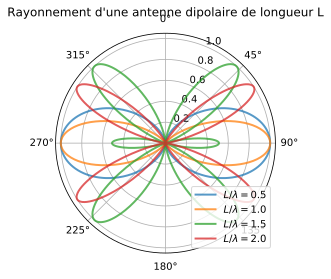

In [8]:
## NOM DU PROGRAMME: DipRadiationGeneral.py
#% IMPORTATION
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

def rho(theta, rapport = 0.5):
    u = rapport* np.pi
    F = (np.cos(u*np.cos(theta)) - np.cos(u))/(np.sin(theta))
    G = F * F
    return G/G.max() 

plt.figure()
ax = plt.subplot(111, polar=True)
plt.title("Rayonnement d'une antenne dipolaire de longueur L")
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rmax(1.0)
theta = np.linspace(0.01,2*np.pi,500)

for rapport in [0.5,1.0,1.5, 2]:
    ax.plot(theta,rho(theta, rapport), lw = 2,
            label=r"$L/\lambda=%.1f$"%rapport, alpha=0.75)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("dipole.png"); plt.savefig("dipole.pdf")
plt.show()

On voit que la directivité de l'émission augmente avec la longueur de l'antenne. Pour $L > \lambda$, il apparaît des lobes à 45 degrés, qui deviennent prépondérants lorsque la longueur augmente.

### Dipôle 3D

In [12]:
#% Dipôle 3D
Theta = np.linspace(0.001,np.pi,400)
Phi = np.linspace(0.001,2*np.pi,400)
THETA, PHI = np.meshgrid(Theta,Phi)
# 
def sph2cart(azimuth,elevation,r):
    """
    Convertisseur de Coordonnée Sphérique/Cartésienne
    """
    x = r * np.sin(elevation) * np.cos(azimuth)
    y = r * np.sin(elevation) * np.sin(azimuth)
    z = r * np.cos(elevation)
    return x, y, z

fig = plt.figure(figsize=(7,5))
# Choix de la palette des couleurs
import matplotlib.colors as mcolors
cmap = plt.get_cmap('gnuplot')
rapport = 3/2 # rapport L/lambda à changer

X, Y, Z = sph2cart(PHI,THETA,rho(THETA,rapport)) 
ax2 = plt.subplot(111, projection='3d')
ax2._axis3don = False # hide x, y, z axis
norm = mcolors.Normalize(vmin=Z.min(), vmax=Z.max())
ax2.plot_surface(X, Y, Z, rstride=8, cstride=8,
                 facecolors=cmap(norm(Z)), antialiased=True, alpha=0.5)
fig.suptitle("Diagramme de rayonnement: "+r"$L/\lambda=%.1f$"%rapport)
plt.tight_layout()
plt.show()

Avec différentes valeurs de $L/\lambda$ on obtient les diagrammes suivants:

<p></p>
<img src="scripts/dipole3D.png" width=500>

<!-- end figure -->



# References
1. <div id="perez1997electromagnetisme"></div> **J.-P. Pérez, R. Fleckinger and R. Carles**. 
    *Electromagnétisme: Fondements Et Applications: Avec 300 Exercices Et Problèmes Résolus*,
    Masson,
    1997.